In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data exploration and Visualisation

In [2]:
data = pd.read_csv('../dataset/HAM10000_metadata.csv')
hmnist_8_8_L = pd.read_csv('../dataset/hmnist_8_8_L.csv')
hmnist_8_8_RGB = pd.read_csv('../dataset/hmnist_8_8_RGB.csv')
hmnist_28_28_L = pd.read_csv('../dataset/hmnist_28_28_L.csv')
hmnist_28_28_RGB = pd.read_csv('../dataset/hmnist_28_28_RGB.csv')

In [3]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [5]:
data.describe(include='all')[0:6]

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0005263,ISIC_0032493,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN


In [6]:
print(data.shape)
print(hmnist_8_8_L.shape)
print(hmnist_8_8_RGB.shape)
print(hmnist_28_28_L.shape)
print(hmnist_28_28_RGB.shape)

(10015, 7)
(10015, 65)
(10015, 193)
(10015, 785)
(10015, 2353)


In [7]:
data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

<AxesSubplot:>

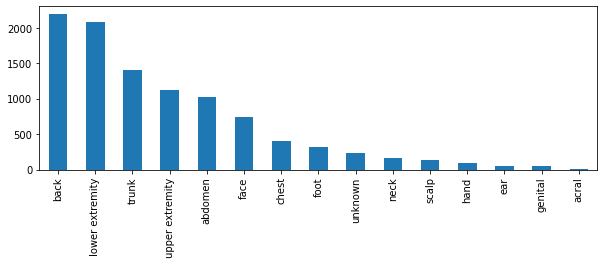

In [8]:
plt.figure(figsize=(10, 3))
data['localization'].value_counts().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

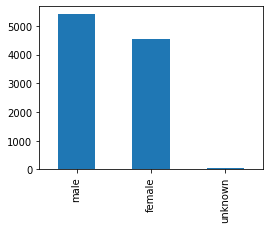

In [9]:
plt.figure(figsize=(4, 3))
data['sex'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Age of patients')

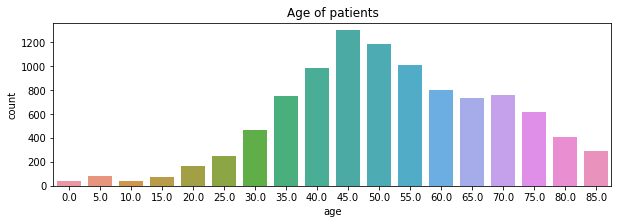

In [10]:
plt.figure(figsize=(10, 3))
sns.countplot(data['age'])
plt.title('Age of patients')

<AxesSubplot:xlabel='dx', ylabel='count'>

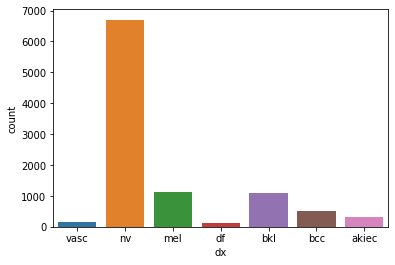

In [11]:
sns.countplot(data['dx'].sort_values(ascending=False))

<AxesSubplot:xlabel='dx_type', ylabel='count'>

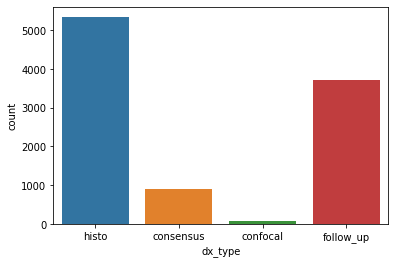

In [12]:
sns.countplot(data['dx_type'])

# Image visualisation (Not very pleasant for the eye)

In [13]:
img1 = Image.open('../dataset/HAM10000_images_part_1/ISIC_0024306.jpg')
img1 = img1.resize((200, 200))

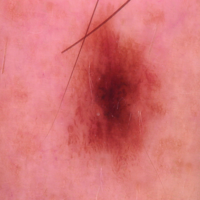

In [14]:
img1

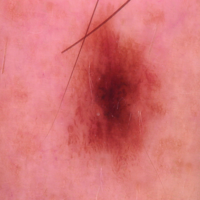

In [17]:
img2 = Image.open('../dataset/HAM10000_images_part_1/ISIC_0025030.jpg')
img2 = img1.resize((200, 200))

img2

# Data Augmentation

In [15]:
datagen = ImageDataGenerator(
        rotation_range=60,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')